In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)



net = Net()

In [8]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 4

for epoch in range(EPOCHS):
  for data in trainset:
    X,y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = loss_function(output, y)
    loss.backward()
    optimizer.step()

  print(loss)

tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.3129, grad_fn=<NllLossBackward0>)
tensor(0.0349, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)


Accuracy:  0.974
tensor(3)


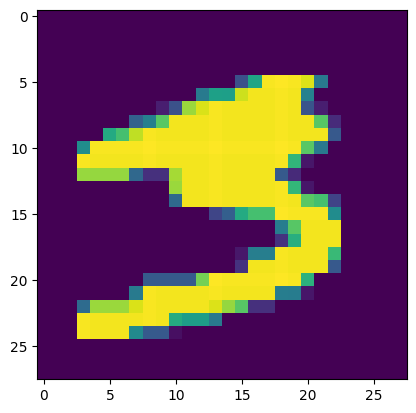

In [21]:
import matplotlib.pyplot as plt

correct = 0
total = 0

with torch.no_grad():
  for data in testset:
    X,y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))


print(torch.argmax(net(X[0].view(-1, 28*28))[0]))
plt.imshow(X[0].view(28,28))
plt.show()